In [3]:
import os 
import pickle as pkl
import numpy as np
import math
from matplotlib import pyplot as plt 


In [4]:
num_sample = 100

with open("./dataset/LAFAN/lafan_60_train_data.pkl", 'rb') as f:
    data = pkl.load(f)
    


In [15]:
data['root_p'].shape

(40296, 60, 3)

In [8]:
np.arange(60)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

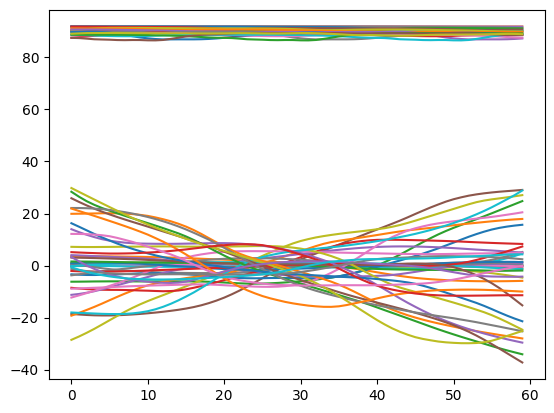

In [19]:
for k in range(20):
    # for i in range(21,23):
    for j in range(3):
        plt.plot(np.arange(60),data['root_p'][k,:,j])
plt.show()    

In [10]:
val_data = np.load('/nas/home/drizzle0171/motion-generation/MotionGPDiffusion/LPM/val_norm_60.npy', allow_pickle=True)
val_data = val_data.item()
val_x_0 = val_data['x_0']
val_label = val_data['real_param']
val_x_0 = (val_x_0 - train_x_0.mean()) / math.sqrt(train_x_0.var())

In [13]:
data_sample = data_sample.permute(0, 2, 1).reshape(num_sample*132, 60)[:, None]

with torch.no_grad():
    output = model(data_sample)
    
_, pred_idx = torch.max(output.data, 1)
output = pred_idx
pred = cls_value[pred_idx]

# 각 length parameter마다 예측한 갯수
for i in [0.03, 0.12, 0.21, 0.3, 0.39, 0.48, 0.57, 0.66, 0.8, 1.0]:
    print(i, ' -> ',sum(pred == i).detach().cpu().numpy())

torch.Size([13200, 1, 60])
tensor([0.1200, 0.1200, 0.1200,  ..., 0.1200, 0.1200, 0.1200], device='cuda:0')


In [ ]:
params = [0.03, 0.12, 0.21, 0.3, 0.39, 0.48, 0.57, 0.66, 0.8, 1.0]

for i in range(10):
    fig, axes= plt.subplots(1,2, figsize=(40, 15))
    fig.tight_layout()
    param = pred == params[i]
    cnt = 0
    
    for j in range(len(param)):
        if param[j]:
            axes[0].plot(times, data_sample[j].detach().cpu().numpy().squeeze(), color='royalblue', alpha=0.6, linewidth=3)
            axes[0].set_title(f'Predicted {params[i]}', fontsize=50, pad=25)
            axes[0].set_ylim(-3, 3)
            axes[0].tick_params(axis="x", labelsize=25)
            axes[0].tick_params(axis="y", labelsize=25)
            cnt += 1
        if cnt > 20:
            break
            cnt = 0
            
    for k in range(5, 20):
        m = i * 100
        axes[1].plot(times, val_x_0[m+k, :, :].detach().cpu().numpy().squeeze(), color='salmon', linewidth=3)
        axes[1].set_title(f'Trajectory when length parameter {params[i]}', fontsize=50, pad=25)
        axes[1].set_ylim(-3, 3)
        axes[1].tick_params(axis="x", labelsize=25)
        axes[1].tick_params(axis="y", labelsize=25)
        
    plt.savefig(f'/nas/home/drizzle0171/motion-generation/MotionGPDiffusion/LPM/result/f60_len_{str(params[i])}.png')
    # plt.clf()
            